<h1> PROJECT OVERVIEW </H1>

descrivere lo scopo del progetto - obiettivi, cosa faremo, contesto di lavoro (spiegare come funzionano inverter energia ecc..)

<h2>Importing Libraries </h2>

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

<H2>Exploratory Data Analysis </h2>

<h3>Loading The Data</h3>

descrizione da dove abbiamo preso i dati e cosa rappresentano, come sono organizzati

In [3]:
#plant 1 generation data 
p1_gen_df = pd.read_csv('Plant_1_Generation_Data.csv')

#plant 2 generation data
p2_gen_df = pd.read_csv('Plant_2_Generation_Data.csv')

#plant 1 weather sensor data
p1_wea_df = pd.read_csv('Plant_1_Weather_Sensor_Data.csv')

#plant 2 weather sensor data
p2_wea_df = pd.read_csv('Plant_2_Weather_Sensor_Data.csv')

<h3> EDA Generation Data Plant 1</h3>

dire che inizialmente condurremo l'analisi solo sul primo impianto, in seguito lavoreremo anche sul secondo

<h3>First Look </h3>

In [4]:
#first 5 rows of the generation data for plant 1
p1_gen_df.head(5)

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,15-05-2020 00:00,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0
1,15-05-2020 00:00,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6183645.0
2,15-05-2020 00:00,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.0,6987759.0
3,15-05-2020 00:00,4135001,7JYdWkrLSPkdwr4,0.0,0.0,0.0,7602960.0
4,15-05-2020 00:00,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.0,7158964.0


In [5]:
#last 5 rows of the generation data for plant 1
p1_gen_df.tail(5)

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
68773,17-06-2020 23:45,4135001,uHbuxQJl8lW7ozc,0.0,0.0,5967.000,7287002.0
68774,17-06-2020 23:45,4135001,wCURE6d3bPkepu2,0.0,0.0,5147.625,7028601.0
68775,17-06-2020 23:45,4135001,z9Y9gH1T5YWrNuG,0.0,0.0,5819.000,7251204.0
68776,17-06-2020 23:45,4135001,zBIq5rxdHJRwDNY,0.0,0.0,5817.000,6583369.0
68777,17-06-2020 23:45,4135001,zVJPv84UY57bAof,0.0,0.0,5910.000,7363272.0


descrizione / spiegazione generation data df e delle sue varibili

<h3>Shape and Size</h3>

In [6]:
# shape and size of the dataset
p1_gen_shape = p1_gen_df.shape
p1_gen_size = p1_gen_df.size
print(f'The Generation Data for the plant 1 is composed by: {p1_gen_shape[0]} rows and {p1_gen_shape[1]} columns.\nFor a total of {p1_gen_size} values')

The Generation Data for the plant 1 is composed by: 68778 rows and 7 columns.
For a total of 481446 values


<h3>Dataframe Info</h3>

In [7]:
#information about the Generation Data for the plant 1
p1_gen_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68778 entries, 0 to 68777
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DATE_TIME    68778 non-null  object 
 1   PLANT_ID     68778 non-null  int64  
 2   SOURCE_KEY   68778 non-null  object 
 3   DC_POWER     68778 non-null  float64
 4   AC_POWER     68778 non-null  float64
 5   DAILY_YIELD  68778 non-null  float64
 6   TOTAL_YIELD  68778 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 3.7+ MB


The dataframe info command give us useful information about the type of the features, the number of null-values and the dimension of the dataset. We can simply notice that the for each columns of the dataset the number of non-null values is the same of the number of rows of the entire dataset, it means that we don't have null values.

<h3>Missing Data </h3>

In [8]:
#to be sure, we can still check for null values
p1_gen_df.isnull().sum()

DATE_TIME      0
PLANT_ID       0
SOURCE_KEY     0
DC_POWER       0
AC_POWER       0
DAILY_YIELD    0
TOTAL_YIELD    0
dtype: int64

we don't have missing data.

<h3>Statistics Summary</h3>

In [22]:
#statistics description of the generation data for the plant 1
p1_gen_df.describe().T

,count,mean,min,25%,50%,75%,max,std
date_time,68778,2020-06-01 08:02:49.458256896,2020-05-15 00:00:00,2020-05-24 00:45:00,2020-06-01 14:30:00,2020-06-09 20:00:00,2020-06-17 23:45:00,NaN
plant_id,68778.0,4135001.0,4135001.0,4135001.0,4135001.0,4135001.0,4135001.0,0.0
dc_power,68778.0,3147.426211,0.0,0.0,429.0,6366.964286,14471.125,4036.457169
ac_power,68778.0,307.802752,0.0,0.0,41.49375,623.61875,1410.95,394.396439
daily_yield,68778.0,3295.968737,0.0,0.0,2658.714286,6274.0,9163.0,3145.178309
total_yield,68778.0,6978711.760671,6183645.0,6512002.53575,7146685.0,7268705.90625,7846821.0,416271.982856


The .describe() method provide a statistics summary of data belonging to numerical datatype for our dataset

<h3>Column Names</h3>

In [10]:
#adjusting the name of the columns in order to make it easier to work with
p1_gen_df.columns = list(map(lambda x : x.lower(),p1_gen_df.columns))
p1_gen_df.columns

Index(['date_time', 'plant_id', 'source_key', 'dc_power', 'ac_power',
       'daily_yield', 'total_yield'],
      dtype='object')

<h3>Feature Analysis</h3>

In [11]:
#date_time
p1_gen_df['date_time']

0        15-05-2020 00:00
1        15-05-2020 00:00
2        15-05-2020 00:00
3        15-05-2020 00:00
4        15-05-2020 00:00
               ...       
68773    17-06-2020 23:45
68774    17-06-2020 23:45
68775    17-06-2020 23:45
68776    17-06-2020 23:45
68777    17-06-2020 23:45
Name: date_time, Length: 68778, dtype: object

In the date time column we have the values every 15 min from 15-05-2020 0:00 until 17-06-2020 23:45. In order to make it easier to work with dates we convert them to time date format

In [12]:
#converting the date_time column in format: datetime ('<M8[ns]')
p1_gen_df['date_time'] = pd.to_datetime(p1_gen_df['date_time'])
p1_gen_df['date_time'].dtype

C:\Users\loris\AppData\Local\Temp\ipykernel_11488\247147572.py:2: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  p1_gen_df['date_time'] = pd.to_datetime(p1_gen_df['date_time'])


dtype('<M8[ns]')

In [13]:
#source_key
p1_invertes = p1_gen_df['source_key'].value_counts().index
p1_invertes

Index(['bvBOhCH3iADSZry', '1BY6WEcLGh8j5v7', '7JYdWkrLSPkdwr4',
       'VHMLBKoKgIrUVDU', 'ZnxXDlPa8U1GXgE', 'ih0vzX44oOqAx2f',
       'z9Y9gH1T5YWrNuG', 'wCURE6d3bPkepu2', 'uHbuxQJl8lW7ozc',
       'pkci93gMrogZuBj', 'iCRJl6heRkivqQ3', 'rGa61gmuvPhdLxV',
       'sjndEbLyjtCKgGv', 'McdE0feGgRqW7Ca', 'zVJPv84UY57bAof',
       'ZoEaEvLYb1n2sOq', '1IF53ai7Xc0U56Y', 'adLQvlD726eNBSB',
       'zBIq5rxdHJRwDNY', 'WRmjgnKYAwPKWDb', '3PZuoBAID5Wc2HD',
       'YxYtjZvoooNbGkE'],
      dtype='object', name='source_key')

The Plant 1 is composed by 22 inversters which we have observations over time, those above are the names of the different inverters.

Plotting the Histograms of the features:

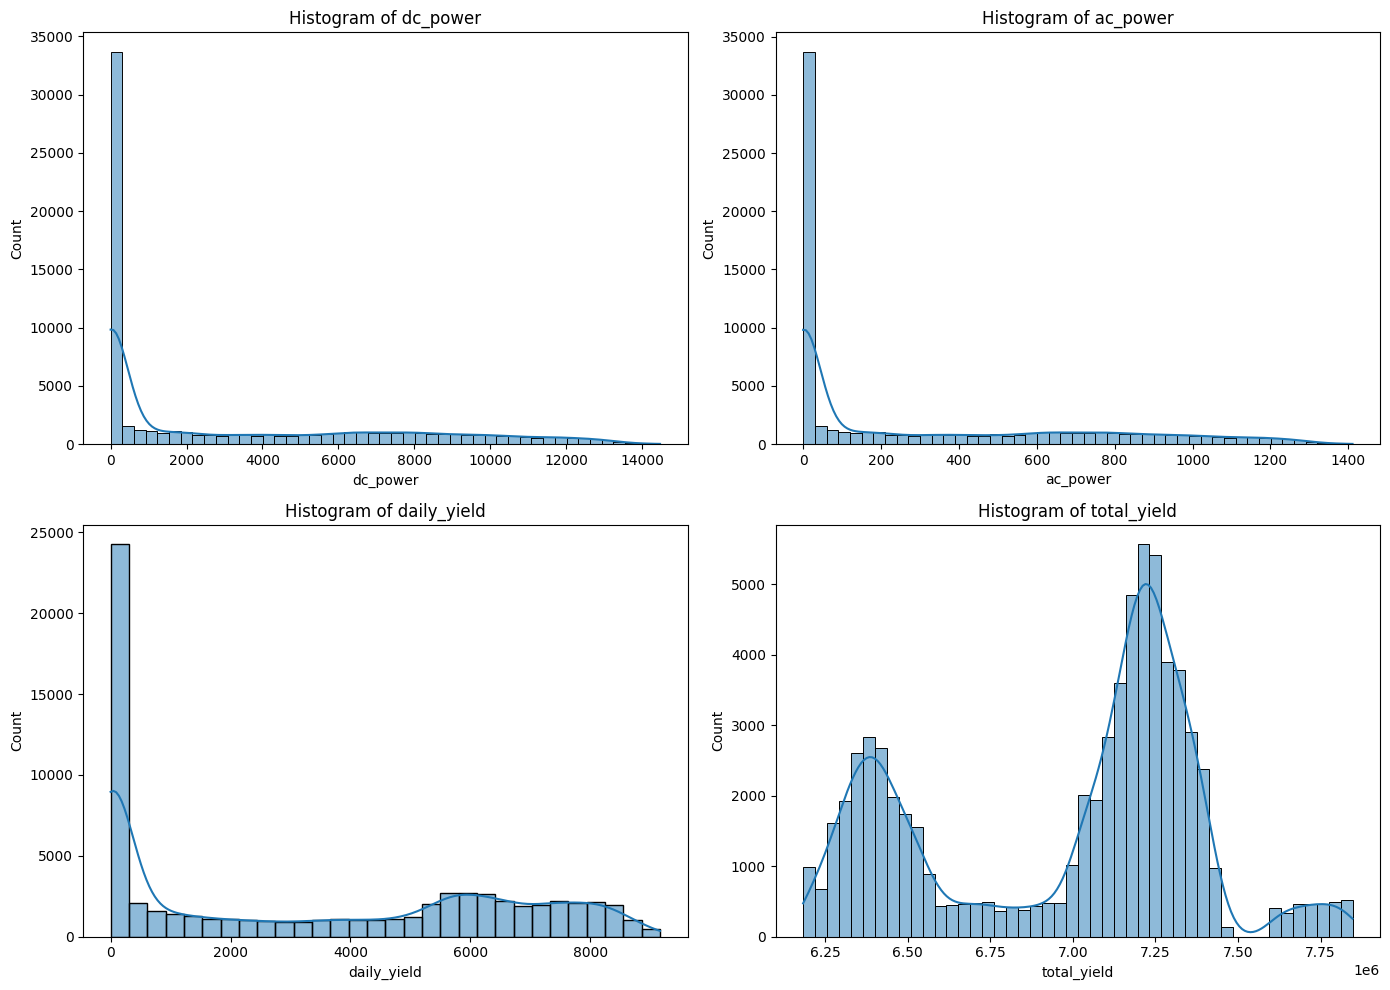

In [14]:
#creating the histograms for this columns
columns_to_check = ['dc_power','ac_power','daily_yield','total_yield']

num_col = len(columns_to_check)
num_rows = (num_col // 2) + (num_col % 2)

#creating the subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(14,5 * num_rows))

axes = axes.flatten()

for ax, col in zip(axes, columns_to_check):
    sns.histplot(p1_gen_df[col], kde=True, ax=ax)
    ax.set_title(f'Histogram of {col}')
plt.tight_layout()
plt.show()

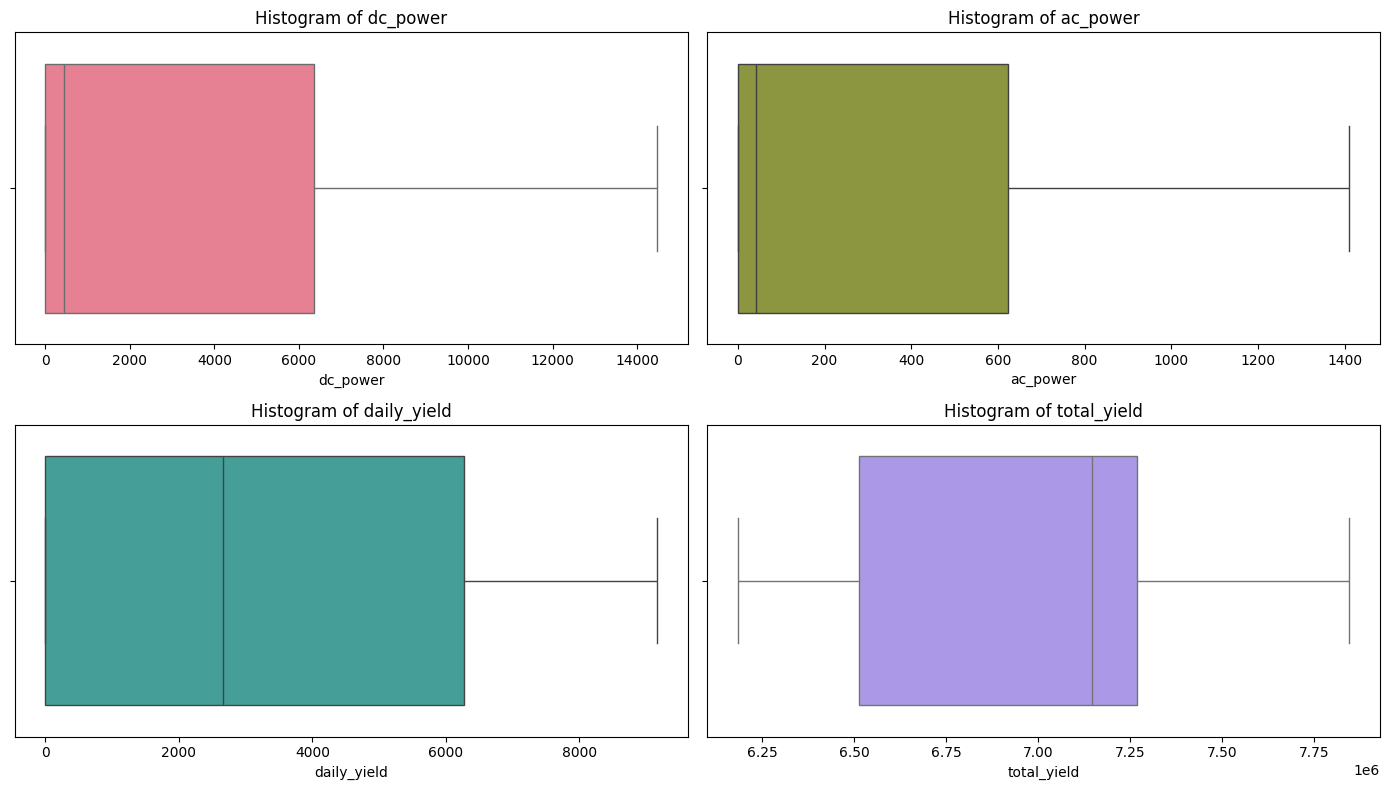

In [15]:
#box plots of the Plant 1 Generation Data
fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(14,4 * num_rows))
axes = axes.flatten()
colors = sns.color_palette("husl", len(columns_to_check))

for ax, col, color in zip(axes, columns_to_check, colors):
    sns.boxplot(x=p1_gen_df[col], ax = ax, color= color)
    ax.set_title(f'Histogram of {col}')
plt.tight_layout()
plt.show()

non so se tenere questo grafico non capisco che informazioni può fornire

<h3>Observations </h3>

We can see that the histograms for AC_power and DC_power have numerous values of 0, this is due to the fact that during nighttime hours the inverters are unable to produce power. In the following analyses we are going to investigate whether these values are always correct or sometimes they may be due to some kind of malfunctioning. In indeed, some of these 0.0 output values could mean that the inverters/sensors are malfunctioning

<h2>Data Visualization </h2>

In this section we will make several plots that will help us to better understand the data, we will try to extract information from them that will be useful in achieving the goals of the project and the implementation of the predictive models

<h3>DC_power & AC_power</h3>

In [16]:
def daily_dc_ac_distribution():
    copy_df = p1_gen_df.copy()
    copy_df['date_time'] = copy_df['date_time'].dt.strftime('%H:%M')
    mean_dc = copy_df.groupby('date_time')['dc_power'].mean().reset_index()
    mean_ac = copy_df.groupby('date_time')['ac_power'].mean().reset_index()
    plt.figure(figsize=(15, 7))
    sns.scatterplot(data=copy_df, x='date_time', y='dc_power', alpha=0.6, color='forestgreen', label='DC Power')
    sns.scatterplot(data=copy_df, x='date_time', y='ac_power', alpha=0.6, color='orange', label='AC Power')
    plt.plot(mean_dc['date_time'], mean_dc['dc_power'], color='darkgreen', marker='o', linestyle='-', linewidth=1.5, markersize=4, label='Mean DC Power')
    plt.plot(mean_ac['date_time'], mean_ac['ac_power'], color='darkorange', marker='o', linestyle='-', linewidth=1.5, markersize=4, label='Mean AC Power')
    plt.title('Daily DC and AC Power Distribution')
    plt.xticks(rotation=90)
    plt.legend()
    plt.tight_layout()
    plt.show()

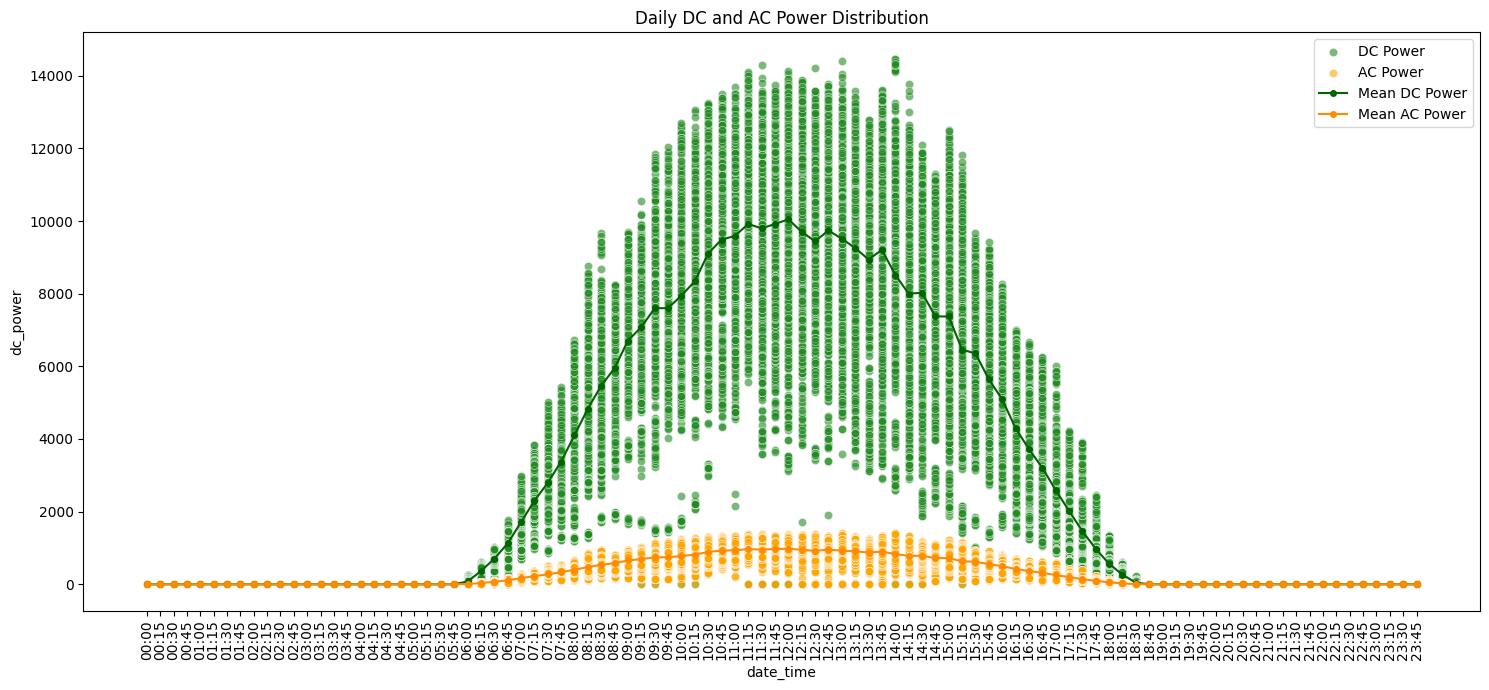

In [17]:
daily_dc_ac_distribution()

This graph allows us to visualize the distribution of dc_power and ac_power produced daily. Recall that the dc_power represents the amount of solar energy that has been collected by the panel and converted to direct current, while the ac_power represents the direct current that the inverter has converted to alternate_current to allow it to be used and transported. As can be seen from the daily distribution, the current is produced from 5:45 am until approximately 6:45 pm, which is during the times when the panels are subject to sunlight.

In [18]:
p1_gen_df

,date_time,plant_id,source_key,dc_power,ac_power,daily_yield,total_yield
0,2020-05-15 00:00:00,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.000,6259559.0
1,2020-05-15 00:00:00,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.000,6183645.0
2,2020-05-15 00:00:00,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.000,6987759.0
3,2020-05-15 00:00:00,4135001,7JYdWkrLSPkdwr4,0.0,0.0,0.000,7602960.0
4,2020-05-15 00:00:00,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.000,7158964.0
...,...,...,...,...,...,...,...
68773,2020-06-17 23:45:00,4135001,uHbuxQJl8lW7ozc,0.0,0.0,5967.000,7287002.0
68774,2020-06-17 23:45:00,4135001,wCURE6d3bPkepu2,0.0,0.0,5147.625,7028601.0
68775,2020-06-17 23:45:00,4135001,z9Y9gH1T5YWrNuG,0.0,0.0,5819.000,7251204.0
68776,2020-06-17 23:45:00,4135001,zBIq5rxdHJRwDNY,0.0,0.0,5817.000,6583369.0


--------------------------
--------------------------
--------------------------

IDEE GRAFICI POSSIBILI:

- funzionamento di un inverter, per ogni inverter plotto la quantità di dc ricevuta e la quantità di ac prodotta
- plotto la daily yield di ciascun inverter per vedere la distribuzione di performance giornaliera
- plotto il daily yield dell'intero dataset
- posso anche fare uno scatter plot per visualizzare la distribuzione di ac power e dc power durante dei giorni
- plotto lo stesso con la total yield
- possibile plottare la dc distribution e ac distribution di ogni giorno per l'ora specifica
- indagare sul giorno che ha avuto la migliore produzione, quindi plotto il daily yield medio per ogni inverter ogni giorno?

OLTRE AL GRAFICO DOBBIAMO PENSARE ALLA SUA FUNZIONALITA' CHE INFORMAZIONI IMPORTANTI CI STA DANDO? (infatti il boxplot che ho fatto prima non saprei interpretarlo.. sarebbe da togliere)

--------------------------
--------------------------
--------------------------

<H3> EDA Weather Sensor Data Plant 1</h3>

In [19]:
p1_wea_df.head(5)

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
1,2020-05-15 00:15:00,4135001,HmiyD2TTLFNqkNe,25.084589,22.761668,0.0
2,2020-05-15 00:30:00,4135001,HmiyD2TTLFNqkNe,24.935753,22.592306,0.0
3,2020-05-15 00:45:00,4135001,HmiyD2TTLFNqkNe,24.846130,22.360852,0.0
4,2020-05-15 01:00:00,4135001,HmiyD2TTLFNqkNe,24.621525,22.165423,0.0


In [20]:
p2_wea_df.head(5)

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,4136001,iq8k7ZNt4Mwm3w0,27.004764,25.060789,0.0
1,2020-05-15 00:15:00,4136001,iq8k7ZNt4Mwm3w0,26.880811,24.421869,0.0
2,2020-05-15 00:30:00,4136001,iq8k7ZNt4Mwm3w0,26.682055,24.427290,0.0
3,2020-05-15 00:45:00,4136001,iq8k7ZNt4Mwm3w0,26.500589,24.420678,0.0
4,2020-05-15 01:00:00,4136001,iq8k7ZNt4Mwm3w0,26.596148,25.088210,0.0


descrizione / spiegazione weather sensor data df 